# Libraries

In [1]:
library(ggplot2)
library(reshape2)

# Options

In [2]:
options(stringsAsFactors = F)

# Paths

In [3]:
path_in <- getwd()
print(paste("input path is:"
           ,path_in))

[1] "input path is: /Users/MariaSolovey/Documents/Helmholtz/AG_Colome/projects/weigert_antoniolli/our_papers/GitHub/MassSpec"


# Variables

In [4]:
massSpecType <- c("surface"
                  ,"total")

# Read in data

In [5]:
# read in color scheme
color_scheme <- read.table(paste0(getwd()
                                  ,"/RGB.MS.txt"
                                 )
                           ,header = TRUE
                           ,sep = "\t"
                          )
rownames(color_scheme) <- paste(color_scheme$genotype
                               ,color_scheme$element
                               ,sep = "_")
print(color_scheme)

                    genotype element   R   G   B
WT_dot                    WT     dot   1   1   1
WT_bar                    WT     bar  51  50  50
WT_border                 WT  border   1   1   1
het_dot                  het     dot 105 153 209
het_bar                  het     bar 201 221 243
het_border               het  border   1   1   1
het+RUNX3_dot      het+RUNX3     dot  48  65 154
het+RUNX3_bar      het+RUNX3     bar 140 185 227
het+RUNX3_border   het+RUNX3  border   1   1   1
KO_dot                    KO     dot 237  34  36
KO_bar                    KO     bar 253 224 223
KO_border                 KO  border   1   1   1
KO+RUNX3_dot        KO+RUNX3     dot 159  28  32
KO+RUNX3_bar        KO+RUNX3     bar 246 158 160
KO+RUNX3_border     KO+RUNX3  border   1   1   1
het+ARID1A_dot    het+ARID1A     dot 129 129 129
het+ARID1A_bar    het+ARID1A     bar 212 212 212
het+ARID1A_border het+ARID1A  border   1   1   1


 ## Read in raw data

In [6]:
# list of files
files <- list.files(path_in)
print(files)

 [1] "RGB.MS.txt"                       "anno_Ly1.txt"                    
 [3] "anno_Ly8.txt"                     "counts_norm_Ly1.txt"             
 [5] "counts_norm_Ly8.txt"              "counts_norm_surface_Ly1.txt"     
 [7] "counts_norm_surface_Ly8.txt"      "counts_norm_total_Ly1.txt"       
 [9] "counts_norm_total_Ly8.txt"        "massSpec_FAS_surface_total.ipynb"
[11] "output_plots"                    


In [7]:
cell_lines <- c("Ly1"
               ,"Ly8")

In [8]:
# read in counts
counts <- lapply(cell_lines
                ,function(cell_line){
                    
                    my_counts <- lapply(massSpecType 
                   ,function(method){
                       
                       
                    ifelse(method == "total"
                           ,file_name <- "counts_norm_total"
                           ,file_name <- "counts_norm_surface"
                          )
                       
                       my_file <- files[grepl(file_name
                                       ,files)]
                       my_file <- my_file[grepl(cell_line
                                       ,my_file)]
                       print(my_file)
                       
                       read.table(file = paste0(path_in
                                            ,"/"
                                            ,my_file)
                               ,sep = "\t"
                               ,header = TRUE)
                   })
                    names(my_counts) <- massSpecType
                    
                    my_counts
                })

names(counts) <- cell_lines 

print(str(counts))
print(head(rownames(counts[[1]])))

[1] "counts_norm_surface_Ly1.txt"
[1] "counts_norm_total_Ly1.txt"
[1] "counts_norm_surface_Ly8.txt"
[1] "counts_norm_total_Ly8.txt"
List of 2
 $ Ly1:List of 2
  ..$ surface:'data.frame':	1 obs. of  9 variables:
  .. ..$ Ly1_nscc_1: num 6339308
  .. ..$ Ly1_nscc_2: num 3021715
  .. ..$ Ly1_nscc_3: num 2847404
  .. ..$ Ly1_het_1 : int 684262
  .. ..$ Ly1_het_2 : int 356996
  .. ..$ Ly1_het_3 : int 467232
  .. ..$ Ly1_KO_1  : int 25230
  .. ..$ Ly1_KO_2  : int 0
  .. ..$ Ly1_KO_3  : int 190843
  ..$ total  :'data.frame':	1 obs. of  9 variables:
  .. ..$ Ly1_nscc_1: num 3041320
  .. ..$ Ly1_nscc_2: num 2904800
  .. ..$ Ly1_nscc_3: int 3136342
  .. ..$ Ly1_het_1 : int 310258
  .. ..$ Ly1_het_2 : int 207010
  .. ..$ Ly1_het_3 : int 244091
  .. ..$ Ly1_KO_1  : int 65569
  .. ..$ Ly1_KO_2  : int 40577
  .. ..$ Ly1_KO_3  : int 41319
 $ Ly8:List of 2
  ..$ surface:'data.frame':	1 obs. of  12 variables:
  .. ..$ Ly8_nscc_1: num 1523080
  .. ..$ Ly8_nscc_2: int 2332444
  .. ..$ Ly8_nscc_3: int 229

In [9]:
# read in anno
anno <- lapply(cell_lines 
              ,function(cell_line ){
                  
                  my_anno <- lapply(massSpecType
                   ,function(method){
                       my_file <- files[grepl("anno_"
                                       ,files)]
                       my_file <- my_file[grepl(cell_line
                                       ,my_file)]
                       print(my_file)
                       
                       read.table(file = paste0(path_in
                                            ,"/"
                                            ,my_file)
                               ,sep = "\t"
                               ,header = TRUE)
                   })
                  
                  names(my_anno) <- massSpecType
                  my_anno
              })

names(anno) <- cell_lines 


print(str(anno))
print(head(rownames(anno[[1]])))

[1] "anno_Ly1.txt"
[1] "anno_Ly1.txt"
[1] "anno_Ly8.txt"
[1] "anno_Ly8.txt"
List of 2
 $ Ly1:List of 2
  ..$ surface:'data.frame':	9 obs. of  4 variables:
  .. ..$ sample_ID: chr [1:9] "Ly1_nscc" "Ly1_nscc" "Ly1_nscc" "Ly1_het" ...
  .. ..$ clone    : chr [1:9] "Ly1_nscc" "Ly1_nscc" "Ly1_nscc" "Ly1_het" ...
  .. ..$ cell_line: chr [1:9] "Ly1" "Ly1" "Ly1" "Ly1" ...
  .. ..$ genotype : chr [1:9] "nscc" "nscc" "nscc" "het" ...
  ..$ total  :'data.frame':	9 obs. of  4 variables:
  .. ..$ sample_ID: chr [1:9] "Ly1_nscc" "Ly1_nscc" "Ly1_nscc" "Ly1_het" ...
  .. ..$ clone    : chr [1:9] "Ly1_nscc" "Ly1_nscc" "Ly1_nscc" "Ly1_het" ...
  .. ..$ cell_line: chr [1:9] "Ly1" "Ly1" "Ly1" "Ly1" ...
  .. ..$ genotype : chr [1:9] "nscc" "nscc" "nscc" "het" ...
 $ Ly8:List of 2
  ..$ surface:'data.frame':	12 obs. of  4 variables:
  .. ..$ sample_ID: chr [1:12] "Ly8_nscc" "Ly8_nscc" "Ly8_nscc" "Ly8_het" ...
  .. ..$ clone    : chr [1:12] "Ly8_nscc" "Ly8_nscc" "Ly8_nscc" "Ly8_het" ...
  .. ..$ cell_line: c

# Process Data

In [10]:
colors_bar <- c("WT" = rgb(color_scheme["WT_bar",]$R
                        ,color_scheme["WT_bar",]$G
                        ,color_scheme["WT_bar",]$B
                         ,maxColorValue = 255
                        )
                ,"het" = rgb(color_scheme["het_bar",]$R
                        ,color_scheme["het_bar",]$G
                        ,color_scheme["het_bar",]$B
                         ,maxColorValue = 255
                        )
                ,"KO" = rgb(color_scheme["KO_bar",]$R
                        ,color_scheme["KO_bar",]$G
                        ,color_scheme["KO_bar",]$B
                         ,maxColorValue = 255
                        )
                ,"her +\nARID1A" = rgb(color_scheme["het+ARID1A_bar",]$R
                        ,color_scheme["het+ARID1A_bar",]$G
                        ,color_scheme["het+ARID1A_bar",]$B
                         ,maxColorValue = 255
                        )
               )
print(colors_bar)

           WT           het            KO her +\nARID1A 
    "#333232"     "#C9DDF3"     "#FDE0DF"     "#D4D4D4" 


In [11]:
colors_dot <- c("WT" = rgb(color_scheme["WT_dot",]$R
                        ,color_scheme["WT_dot",]$G
                        ,color_scheme["WT_dot",]$B
                         ,maxColorValue = 255
                        )
                ,"het" = rgb(color_scheme["het_dot",]$R
                        ,color_scheme["het_dot",]$G
                        ,color_scheme["het_dot",]$B
                         ,maxColorValue = 255
                        )
                ,"KO" = rgb(color_scheme["KO_dot",]$R
                        ,color_scheme["KO_dot",]$G
                        ,color_scheme["KO_dot",]$B
                         ,maxColorValue = 255
                        )
                ,"her +\nARID1A" = rgb(color_scheme["het+ARID1A_dot",]$R
                        ,color_scheme["het+ARID1A_dot",]$G
                        ,color_scheme["het+ARID1A_dot",]$B
                         ,maxColorValue = 255
                        )
               )
print(colors_dot)

           WT           het            KO her +\nARID1A 
    "#010101"     "#6999D1"     "#ED2224"     "#818181" 


In [12]:
color_border <- rgb(color_scheme["WT_border",]$R
                        ,color_scheme["WT_border",]$G
                        ,color_scheme["WT_border",]$B
                         ,maxColorValue = 255
                        )
print(color_border)

[1] "#010101"


# Plots

In [13]:
dir.create("output_plots")

Warning message in dir.create("output_plots"):
“'output_plots' existiert bereits”


In [14]:
pointplot <- function(data # dataframe, contains columns "genotype" (Ctrl or mut), "value" and "group_original
                    ,ylab
                    ,ylim = c(0,3.1)
                    ,fontsize = 24
                    ,fill_vector # for bars
                    ,color_vector # for dots
                    ,color_border # for border
                    ,seed = 1
                      ,title
                    ){
        
        my_means <- sapply(unique(data$genotype)
                           ,function(g){
                                   idx_g <- data$genotype == g
                                   mean(data$value[idx_g])
                           })
        my_sd <- sapply(unique(data$genotype)
                        ,function(g){
                                idx_g <- data$genotype == g
                                sd(data$value[idx_g])
                        })
        df_means <- data.frame(genotype = unique(data$genotype)
                               ,mean = my_means
                               ,sd = my_sd)
        
        ggplot() +
                scale_y_continuous(expand = c(0,0)
                                   ,limits = ylim) + # no space to x-axis
                geom_point(data = data
                            ,aes(x = genotype
                                 ,y = value
                                 ,color = group_original)
                            ,size = 5
                            ,position = position_jitter(seed = seed
                                                        ,w = 0.1
                                                        ,height = 0))+
                scale_color_manual(values = color_vector)+
                geom_point(data = data
                            ,aes(x = genotype
                                 ,y = value)
                            ,shape = 1
                            ,color = color_border
                            ,size = 5
                            ,stroke = 1
                            ,position = position_jitter(seed = seed
                                                        ,width = 0.1
                                                        ,height = 0))+
                geom_errorbar(data = df_means
                              ,aes(x = genotype
                                   ,min = mean - sd
                                   ,max = mean + sd
                              )
                              ,width=0.3
                              ,lwd = 0.7
                              , colour=color_border
                              , size=1.3)+
                scale_fill_manual(values = fill_vector)+
                ylab(ylab)+
                xlab("")+
    ggtitle(title)+
                theme_classic() +
                theme(legend.position="none"
                      ,axis.title = element_text(size = fontsize)
                      ,axis.text = element_text(size = fontsize)
                      #,legend.text = element_text(size = fontsize)
                      #,legend.title = element_text(size = 0)
                      ,plot.title = element_text(size=fontsize)
                )
}



[1] "Ly1"
[1] "surface"
             value group_original genotype
Ly1_nscc_1 6339308             WT       WT
Ly1_nscc_2 3021715             WT       WT
Ly1_nscc_3 2847404             WT       WT
Ly1_het_1   684262            het het / KO
Ly1_het_2   356996            het het / KO
Ly1_het_3   467232            het het / KO
Ly1_KO_1     25230             KO het / KO
Ly1_KO_2         0             KO het / KO
Ly1_KO_3    190843             KO het / KO


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


[1] "total"
             value group_original genotype
Ly1_nscc_1 3041320             WT       WT
Ly1_nscc_2 2904800             WT       WT
Ly1_nscc_3 3136342             WT       WT
Ly1_het_1   310258            het het / KO
Ly1_het_2   207010            het het / KO
Ly1_het_3   244091            het het / KO
Ly1_KO_1     65569             KO het / KO
Ly1_KO_2     40577             KO het / KO
Ly1_KO_3     41319             KO het / KO
[1] "Ly8"
[1] "surface"
             value group_original     genotype
Ly8_nscc_1 1523080             WT           WT
Ly8_nscc_2 2332444             WT           WT
Ly8_nscc_3 2299863             WT           WT
Ly8_het_1  1139535            het     het / KO
Ly8_het_2  1140872            het     het / KO
Ly8_het_3  1791330            het     het / KO
Ly8_KO_1    296366             KO     het / KO
Ly8_KO_2     31969             KO     het / KO
Ly8_KO_3    136027             KO     het / KO
Ly8_rsc_1  2539179   het+\nARID1A het+\nARID1A
Ly8_rsc_2  186840

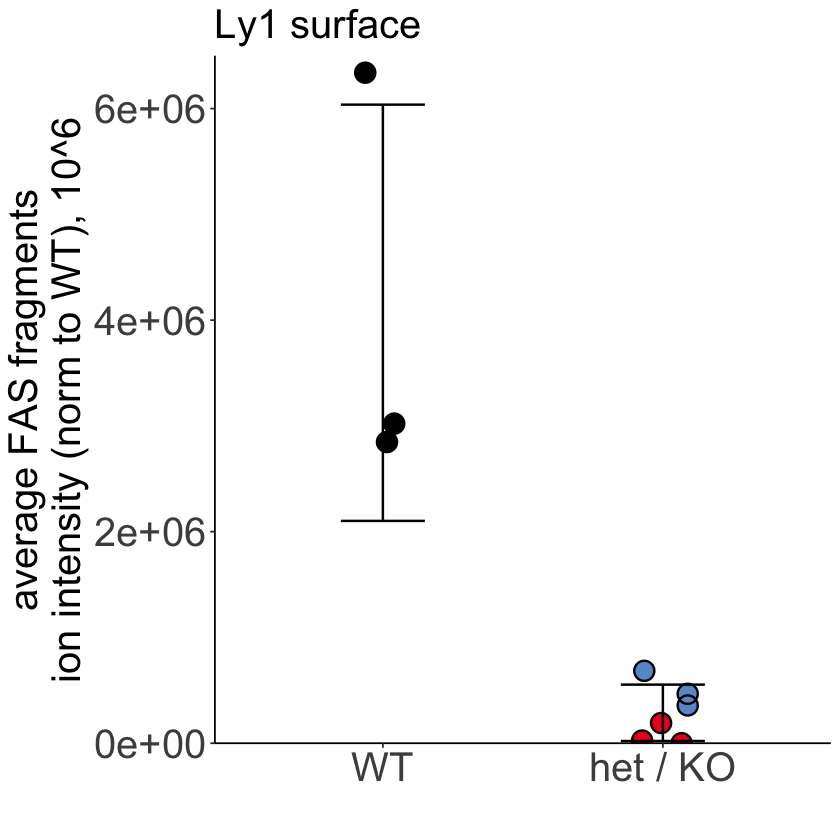

[1] "total"
             value group_original     genotype
Ly8_nscc_1 1933050             WT           WT
Ly8_nscc_2 2072710             WT           WT
Ly8_nscc_3 2041462             WT           WT
Ly8_het_1  1491268            het     het / KO
Ly8_het_2  1630144            het     het / KO
Ly8_het_3  1417797            het     het / KO
Ly8_KO_1    319544             KO     het / KO
Ly8_KO_2     91439             KO     het / KO
Ly8_KO_3    213067             KO     het / KO
Ly8_rsc_1  1940346   het+\nARID1A het+\nARID1A
Ly8_rsc_2  1884495   het+\nARID1A het+\nARID1A
Ly8_rsc_3  2001468   het+\nARID1A het+\nARID1A


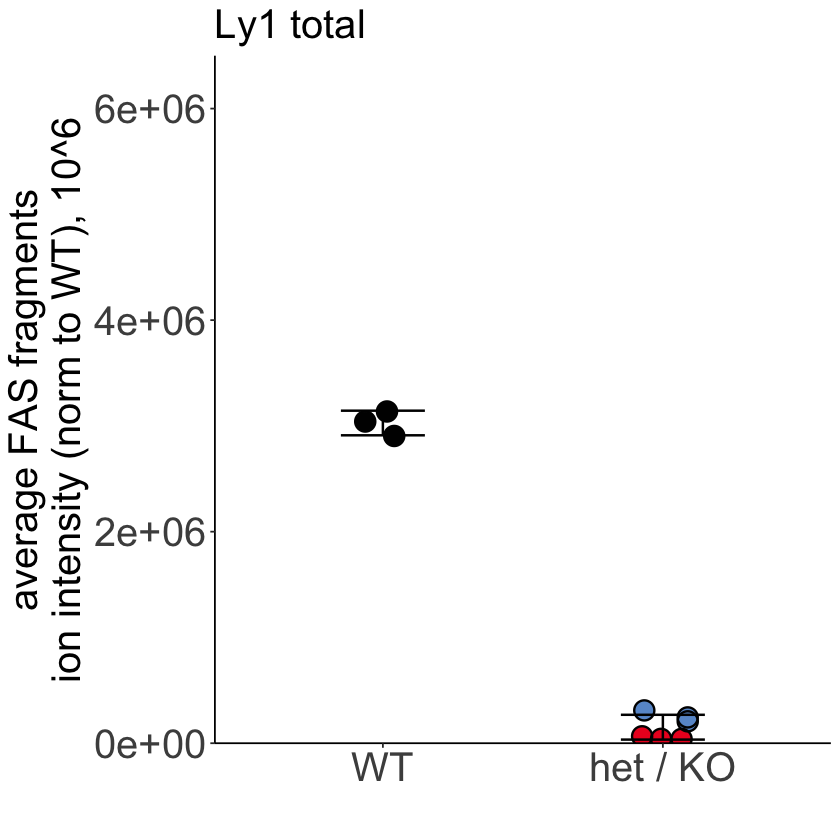

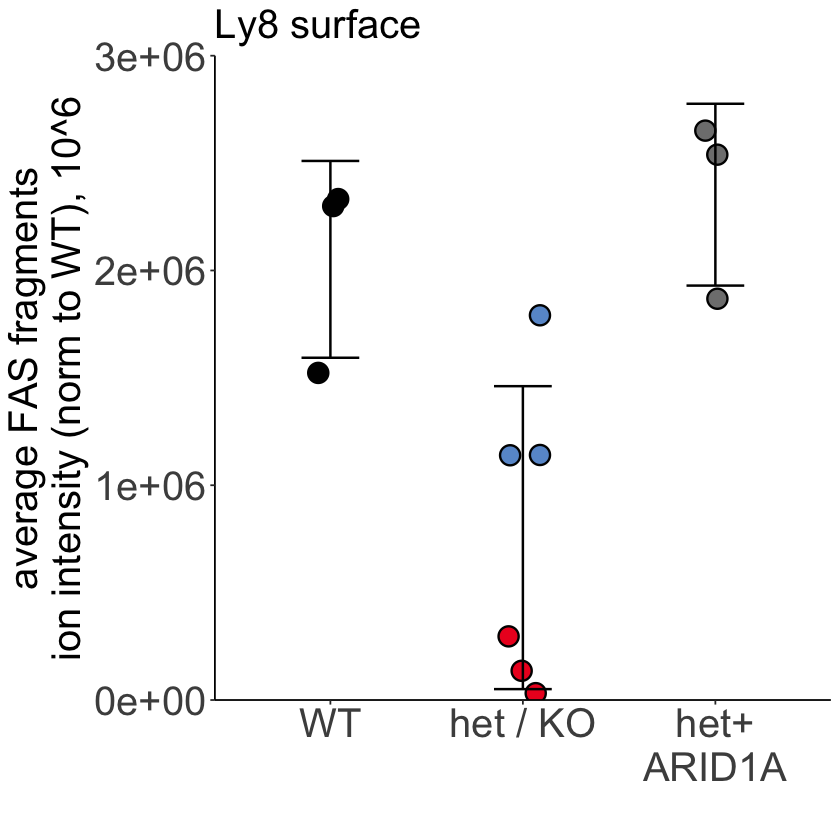

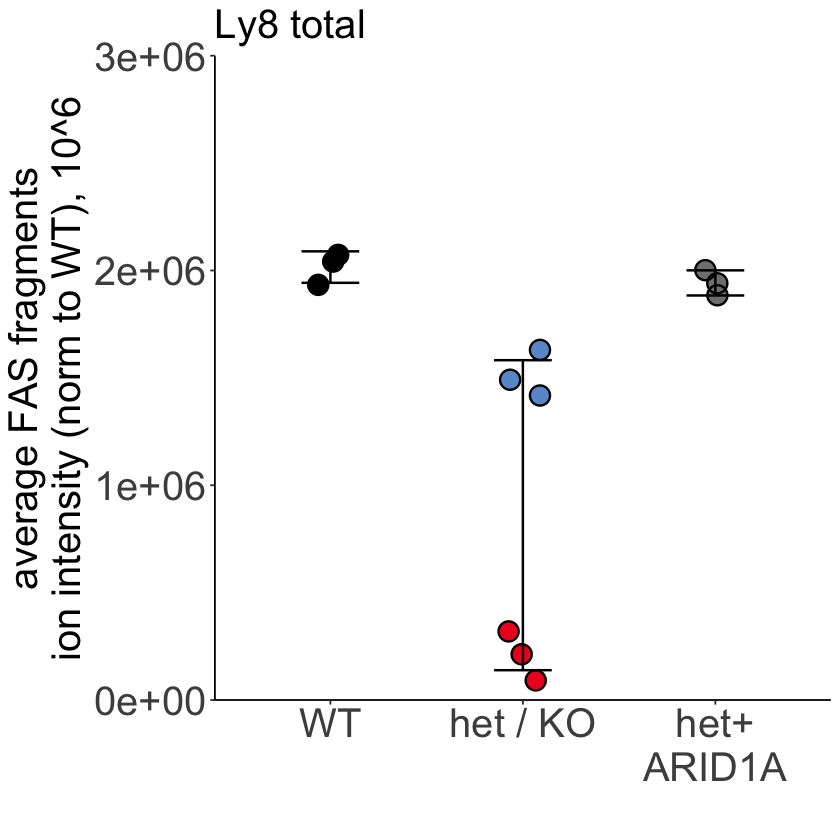

In [15]:
for(cell_line in cell_lines
       ){
    print(cell_line)
    for(mtype in massSpecType){
        print(mtype)
        # subset
        my_counts <- as.data.frame(unlist(counts[[cell_line]][[mtype]]))
        colnames(my_counts) <- "value"
        
        my_counts$group_original <- gsub(".*[_](.+)[_].*", "\\1"
                         ,rownames(my_counts)) 
        my_counts$group_original <- sapply(my_counts$group_original
                                     ,function(g) {
                                         ifelse(g == "nscc"
                                                 ,"WT"
                                                 ,ifelse(g=="rsc"
                                                        ,"het+\nARID1A"
                                                        ,g)
                                               )
                                     }
                                    )
        
        my_counts$genotype <- my_counts$group_original
        my_counts$genotype[ my_counts$genotype %in% c("het", "KO")] <- "het / KO"
        
        
        my_counts$group_original <- factor(my_counts$group_original
                                          ,levels = c("WT","het", "KO", "het+\nARID1A")
                                          )
        my_counts$genotype <- factor(my_counts$genotype
                                     ,levels = c("WT","het / KO", "het+\nARID1A")
                                     ,ordered = T
                                     )
        
        print(my_counts)
        
        # define ylim_max
        ifelse(cell_line == "Ly8"
              ,ylim_max <- 3000000
              ,ylim_max <- 6500000)
        
        
        p <- pointplot(data = my_counts
                     ,ylim = c(0,ylim_max)
                    ,ylab = "average FAS fragments\nion intensity (norm to WT), 10^6"
                    ,fill_vector = colors_bar
                    ,color_vector = colors_dot
                    ,color_border = color_border
                    ,title = paste(cell_line,mtype)
                    ,seed = 2)
        
        ggsave(file=paste0("./output_plots/masSpec_FAS_"
                           ,cell_line
                           ,"_"
                           ,mtype
                           ,"_dotplot.svg")
               , plot=p
               , width=5
               , height=5)
        
        print(p)
        
    }
    }

In [16]:
for(cell_line in cell_lines){
    for(method in massSpecType){
        print(cell_line)
        print(method)
        my_counts <- counts[[cell_line]][[method]]
        #print(str(my_counts))
        idx_wt <- grepl("nscc"
                       ,colnames(my_counts))
        print(t.test(x = my_counts[,idx_wt]
                    ,y = my_counts[,!idx_wt]
                    )
             )
    }
}

[1] "Ly1"
[1] "surface"

	Welch Two Sample t-test

data:  my_counts[, idx_wt] and my_counts[, !idx_wt]
t = 3.314, df = 2.0368, p-value = 0.07828
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1044208  8608305
sample estimates:
mean of x mean of y 
4069475.9  287427.2 

[1] "Ly1"
[1] "total"

	Welch Two Sample t-test

data:  my_counts[, idx_wt] and my_counts[, !idx_wt]
t = 34.864, df = 4.1188, p-value = 3.015e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2649563 3102471
sample estimates:
mean of x mean of y 
3027487.4  151470.7 

[1] "Ly8"
[1] "surface"

	Welch Two Sample t-test

data:  my_counts[, idx_wt] and my_counts[, !idx_wt]
t = 1.7979, df = 8.1901, p-value = 0.109
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -211816.8 1738784.5
sample estimates:
mean of x mean of y 
  2051796   1288312 

[1] "Ly8"
[1] "total"

	Welc